In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
file_path = r"sales_discounts.csv"
df = pd.read_csv(file_path)
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102960   
2      16100             112700           9.456886     10657.910160   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0     160346.50120  
1      89323.89704  
2     102042.08980  
3     112235.92530  


In [3]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_columns)
stats = df[numerical_columns].agg(['mean', 'median', 'std'])
print("Descriptive Statistics (Mean, Median, Std):")
print(stats)
mode_values = df[numerical_columns].mode().iloc[0]  
print("Mode Values:")
print(mode_values)

Numerical Columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')
Descriptive Statistics (Mean, Median, Std):
          Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
mean    5.066667  10453.433333       33812.835556          15.155242   
median  4.000000   1450.000000        5700.000000          16.577766   
std     4.231602  18079.904840       50535.074173           4.220602   

        Discount Amount  Net Sales Value  
mean        3346.499424     30466.336131  
median       988.933733      4677.788059  
std         4509.902963     46358.656624  
Mode Values:
Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64


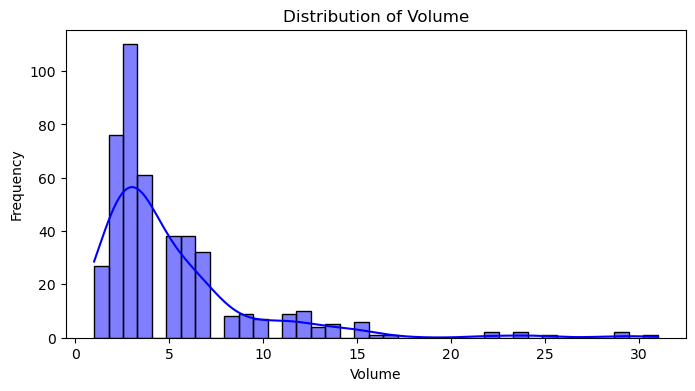

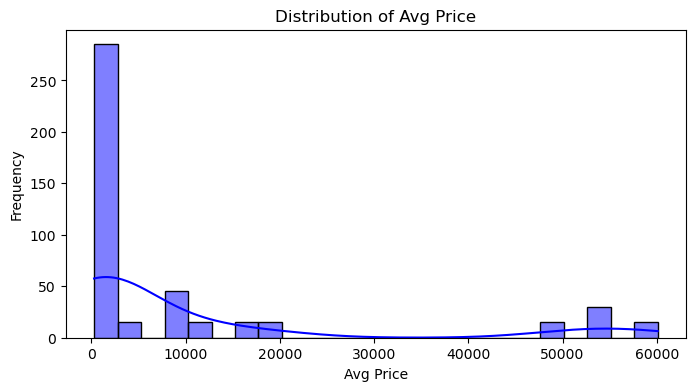

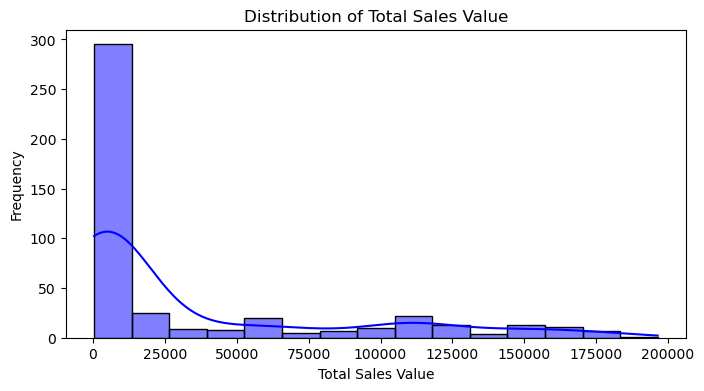

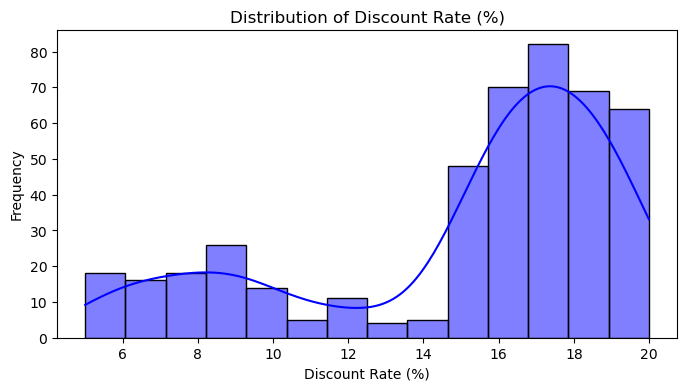

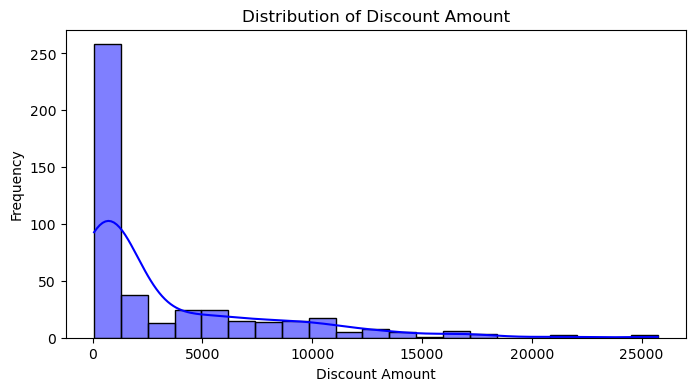

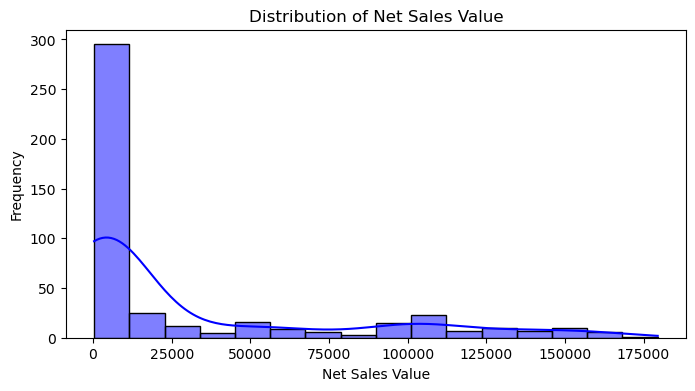

In [4]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

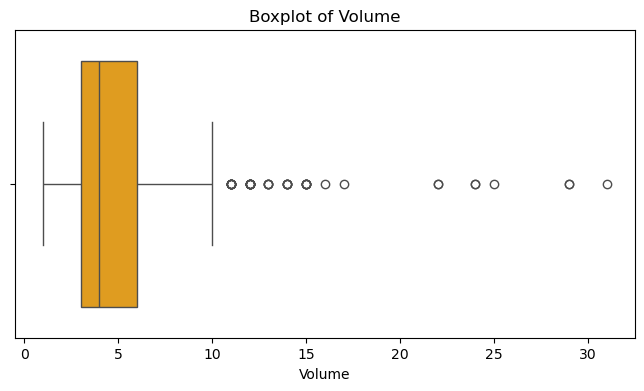

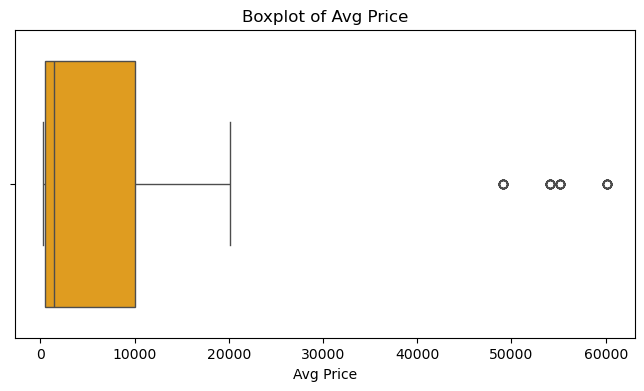

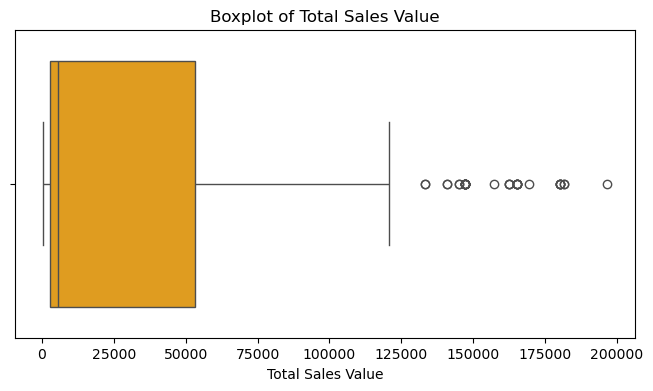

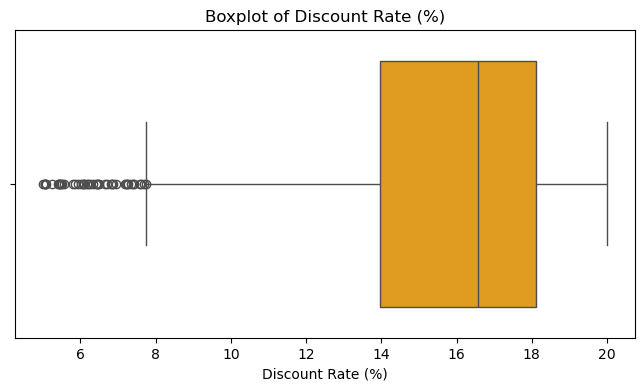

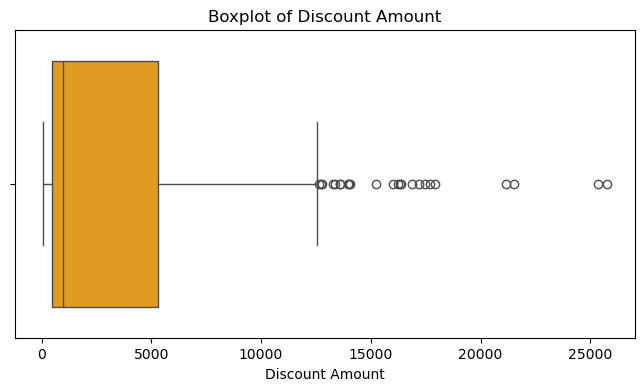

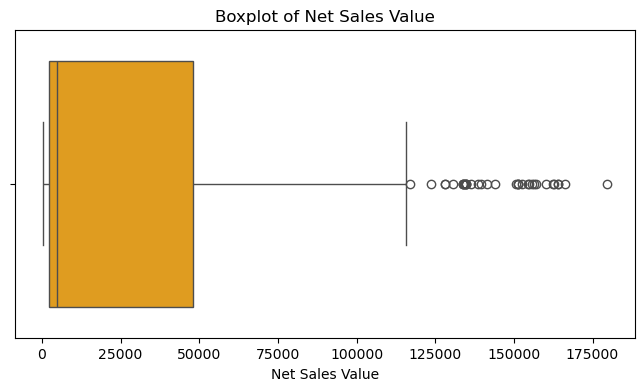

In [5]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()
categorical_columns = df.select_dtypes(include=['object']).columns


C:\Users\marri\AppData\Local\Temp\ipykernel_11600\786951551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


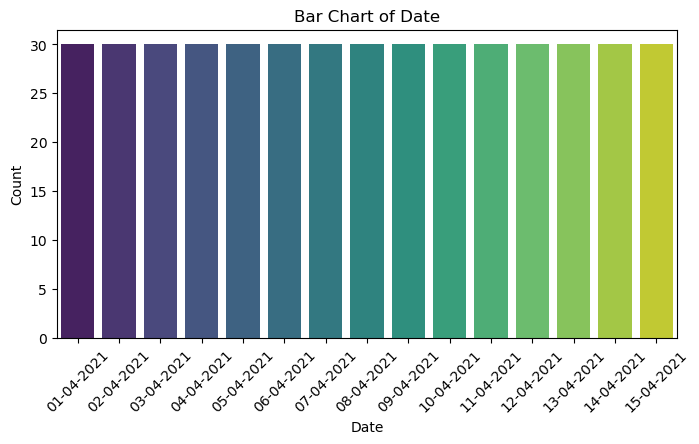

C:\Users\marri\AppData\Local\Temp\ipykernel_11600\786951551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


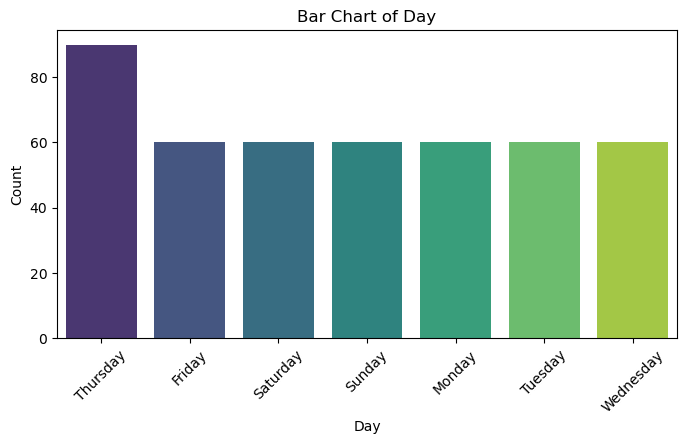

C:\Users\marri\AppData\Local\Temp\ipykernel_11600\786951551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


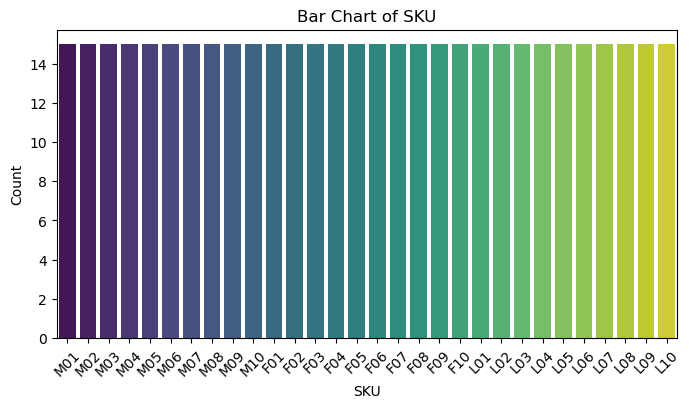

C:\Users\marri\AppData\Local\Temp\ipykernel_11600\786951551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


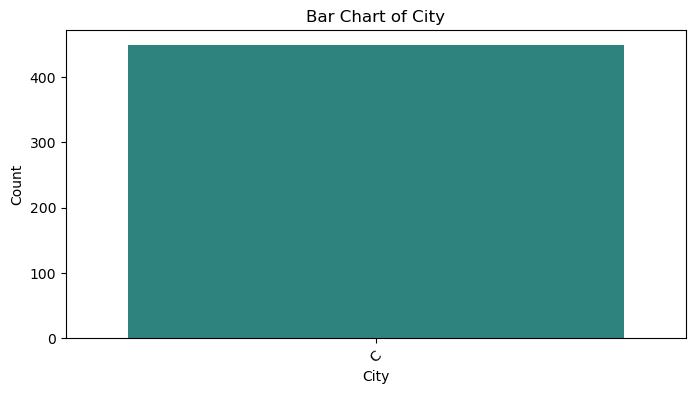

C:\Users\marri\AppData\Local\Temp\ipykernel_11600\786951551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


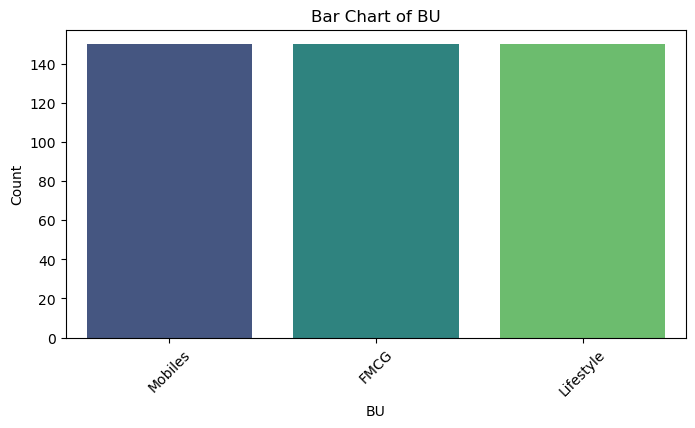

C:\Users\marri\AppData\Local\Temp\ipykernel_11600\786951551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


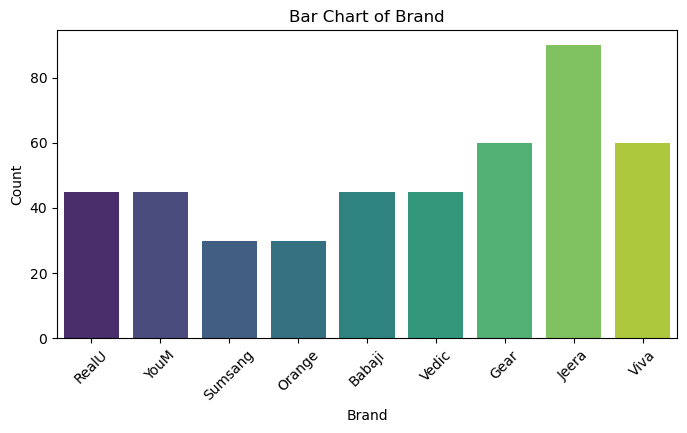

C:\Users\marri\AppData\Local\Temp\ipykernel_11600\786951551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


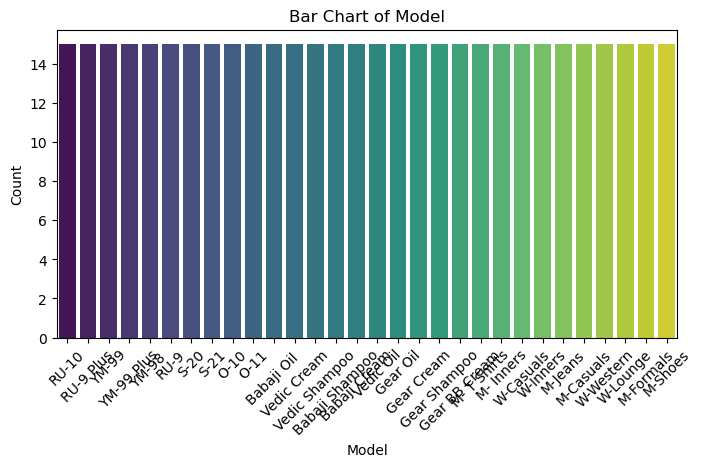

In [6]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [7]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print("Standardized Numerical Columns:")
print(df[numerical_columns].head())
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("Dataset After One-Hot Encoding:")
print(df.head())
df.to_csv(r"C:\Users\marri\OneDrive\Desktop\preprocessed_sales_discounts.csv", index=False)
print("Preprocessed Dataset Saved!")

Standardized Numerical Columns:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  
Dataset After One-Hot Encoding:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   